### Preface: this study is stage 7 in the development of a project on cryptocurrencies and step 4 in portfolio modeling.

import required libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from tqdm.autonotebook import tqdm

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, AffinityPropagation, Birch

In [2]:
def get_info(ticker_obj):
    info_keys = ['shortName']
    info_values = []
    for key in info_keys:
        info_values.append(ticker_obj.info.get(key, None))
    return dict(zip(info_keys, info_values))

Upload the data <br>
The work was done with data from Dec 2014 to Feb 2023

In [3]:
interesting_tickers = ['BTC-USD','ETH-USD', 'BNB-USD', 'ADA-USD', 'DOGE-USD', 'SHIB-USD', 'LTC-USD', 'ETC-USD', 
           'BCH-USD', 'VET-USD', 'FIL-USD', 'SNX-USD', 'KAVA-USD', 'TWT-USD', 'KSM-USD', 'YFI-USD',
          'UTK-USD', 'RPL-USD', 'SOL-USD', '1INCH-USD', 'THETA-USD', 'OCEAN-USD', 'CHR-USD', 'WRX-USD',
          'DENT-USD', 'DNT-USD', 'CRV-USD', 'DOT-USD', 'KEY-USD', 'BEAM-USD', 'MATIC-USD', 'HEX-USD',
           'AAVE-USD', 'EGLD-USD', 'XRP-USD', 'CAKE-USD', 'HNT-USD', 'DASH-USD', 'ZIL-USD','XDC-USD',
           'KSM-USD','CEL-USD', 'QTUM-USD', 'GLM-USD', 'WAXP-USD', 'NFLX-USD', 'QNT-USD', 'AAPL-USD',
          'NVDA-USD', 'GOOGL-USD']
load = True

if load:
    full_ticker_data = []
    for ticker in tqdm(interesting_tickers):  #tqdm - помогает понять, сколько уже сделано (визуальная стркоа загрузки)
        try:
            ticker_obj = yf.Ticker(ticker)
            close_price = ticker_obj.history(period='3y', interval='1d')['Close'].to_dict()
            info = get_info(ticker_obj)
            info.update(close_price)
            full_ticker_data.append(info)
        except Exception as e:
            print(e)
            continue
        
    full_ticker_df_0 = pd.DataFrame(full_ticker_data)
    full_ticker_df = pd.DataFrame(full_ticker_df_0.iloc[:,1:].pct_change(axis='columns'))
    full_ticker_df.insert(0, "shortName", full_ticker_df_0.shortName)

  0%|          | 0/50 [00:00<?, ?it/s]

### Minor data preprocessing

In [5]:
full_ticker_df.shortName = [i.partition('-')[0] for i in interesting_tickers]
full_ticker_df.drop(columns=full_ticker_df.columns[1], axis=1, inplace=True) # удаляем колонку с индексом 1, т.к. она имеет только пропущенные значения
full_ticker_df.head(6)

,shortName,2021-06-16 00:00:00+00:00,2021-06-17 00:00:00+00:00,2021-06-18 00:00:00+00:00,2021-06-19 00:00:00+00:00,2021-06-20 00:00:00+00:00,2021-06-21 00:00:00+00:00,2021-06-22 00:00:00+00:00,2021-06-23 00:00:00+00:00,2021-06-24 00:00:00+00:00,...,2024-06-06 00:00:00+00:00,2024-06-07 00:00:00+00:00,2024-06-08 00:00:00+00:00,2024-06-09 00:00:00+00:00,2024-06-10 00:00:00+00:00,2024-06-11 00:00:00+00:00,2024-06-12 00:00:00+00:00,2024-06-13 00:00:00+00:00,2024-06-14 00:00:00+00:00,2024-06-15 00:00:00+00:00
0,BTC,-0.050963,-0.007655,-0.059555,-0.004789,0.002314,-0.112655,0.026170,0.037451,0.027857,...,-0.004581,-0.019992,-0.000531,0.004938,-0.001949,-0.031365,0.013503,-0.021758,-0.011165,0.003760
1,ETH,-0.093175,0.001832,-0.059135,-0.023853,0.031152,-0.159332,-0.007147,0.061221,-0.000643,...,-0.013626,-0.034887,0.000631,0.006779,-0.010574,-0.045923,0.017519,-0.025378,0.003168,0.015407
2,BNB,-0.071025,0.016440,-0.045158,-0.003257,0.012971,-0.203144,-0.033826,0.124790,0.047223,...,0.016561,-0.038148,-0.001018,-0.013696,-0.072668,-0.034960,0.027610,-0.031783,0.006114,0.006605
3,ADA,-0.072090,-0.000256,-0.045067,-0.017540,0.027771,-0.176120,-0.020574,0.086401,0.082362,...,-0.006663,-0.018465,-0.029072,0.017260,-0.008208,-0.042160,0.037699,-0.037942,-0.022560,-0.002167
4,DOGE,-0.062793,-0.004110,-0.042493,-0.020840,-0.022467,-0.363863,0.069058,0.215373,0.131832,...,-0.018844,-0.074026,-0.015131,0.004895,-0.013858,-0.045848,0.058593,-0.035131,-0.043173,0.010691
5,SHIB,0.142857,0.000000,-0.125000,0.142857,0.000000,-0.250000,0.000000,0.166667,0.000000,...,-0.038462,-0.040000,-0.041667,0.000000,0.000000,-0.043478,0.000000,-0.045455,-0.047619,0.036372


In [7]:
full_ticker_df.columns = pd.to_datetime(full_ticker_df.columns[1:]).insert(0, 'shortName')
full_ticker_df.head()

,shortName,2021-06-16 00:00:00+00:00,2021-06-17 00:00:00+00:00,2021-06-18 00:00:00+00:00,2021-06-19 00:00:00+00:00,2021-06-20 00:00:00+00:00,2021-06-21 00:00:00+00:00,2021-06-22 00:00:00+00:00,2021-06-23 00:00:00+00:00,2021-06-24 00:00:00+00:00,...,2024-06-06 00:00:00+00:00,2024-06-07 00:00:00+00:00,2024-06-08 00:00:00+00:00,2024-06-09 00:00:00+00:00,2024-06-10 00:00:00+00:00,2024-06-11 00:00:00+00:00,2024-06-12 00:00:00+00:00,2024-06-13 00:00:00+00:00,2024-06-14 00:00:00+00:00,2024-06-15 00:00:00+00:00
0,BTC,-0.050963,-0.007655,-0.059555,-0.004789,0.002314,-0.112655,0.026170,0.037451,0.027857,...,-0.004581,-0.019992,-0.000531,0.004938,-0.001949,-0.031365,0.013503,-0.021758,-0.011165,0.003760
1,ETH,-0.093175,0.001832,-0.059135,-0.023853,0.031152,-0.159332,-0.007147,0.061221,-0.000643,...,-0.013626,-0.034887,0.000631,0.006779,-0.010574,-0.045923,0.017519,-0.025378,0.003168,0.015407
2,BNB,-0.071025,0.016440,-0.045158,-0.003257,0.012971,-0.203144,-0.033826,0.124790,0.047223,...,0.016561,-0.038148,-0.001018,-0.013696,-0.072668,-0.034960,0.027610,-0.031783,0.006114,0.006605
3,ADA,-0.072090,-0.000256,-0.045067,-0.017540,0.027771,-0.176120,-0.020574,0.086401,0.082362,...,-0.006663,-0.018465,-0.029072,0.017260,-0.008208,-0.042160,0.037699,-0.037942,-0.022560,-0.002167
4,DOGE,-0.062793,-0.004110,-0.042493,-0.020840,-0.022467,-0.363863,0.069058,0.215373,0.131832,...,-0.018844,-0.074026,-0.015131,0.004895,-0.013858,-0.045848,0.058593,-0.035131,-0.043173,0.010691


## Correct the revenue function (with the addition of the degree to obtain an average daily change in asset return)

In [8]:
def revenue_for_each_asset(df):
    rev_for_current_asset = 1
    for j in df:
        rev_for_current_asset *= (1 + j)  
    otv_ = (rev_for_current_asset**(1/df.shape[0])-1)*100
    return otv_

def VaR(df):
    return df.std()

# def delete_outliers(df):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     filtered_df = df[(df >= lower_bound) & (df <= upper_bound)]
#     return filtered_df

Var_for_each_asset = []
Revenue_for_each_asset = []
frame_of_rev = pd.DataFrame()
for i in range(len(full_ticker_df)):
    #filt_df = delete_outliers(full_ticker_df.iloc[i, 1:])
    filt_df = full_ticker_df.iloc[i, 1:]
    Revenue_for_each_asset.append(revenue_for_each_asset(filt_df))
    Var_for_each_asset.append(VaR(filt_df.T) * 100)

frame_of_rev['Revenue'] = Revenue_for_each_asset
frame_of_rev['Risk'] = Var_for_each_asset
frame_of_rev.index = full_ticker_df['shortName']
display(frame_of_rev)

,Revenue,Risk
shortName,,
BTC,0.045137,3.009180
ETH,0.027622,3.761612
BNB,0.044326,3.444668
ADA,-0.123853,4.323931
DOGE,-0.080122,5.081765
SHIB,0.099095,7.356545
LTC,-0.074838,4.160582
ETC,-0.077943,4.926179
BCH,-0.037142,4.674006


# My KMeans

In [9]:
def like_kmeans(centroids, X, max_iter=500):
    old_centroids = []
    X = X
    dict_with_centroids = {}
    
    # Manual implementation of KMeans
    for i, elem in enumerate(X[:centroids]):
        old_centroids.append([elem[0], elem[1]])
        dict_with_centroids[i] = []
    
    # Develop a model
    new_centroids = []
    dtw_s = []
    for _ in range(max_iter):
        sum_min_dtw = []
        current_clusters = []
        for j in X:
            dtw_s = []
            for centroida in old_centroids:
                dtw = np.sqrt(np.sum([np.square(j[0]-centroida[0]), np.square(j[1] - centroida[1])]))
                dtw_s.append(dtw)
            # Determine the best centroid
            current_clusters.append(np.argmin(dtw_s))
            # Add the min value to sum_min_dtw
            sum_min_dtw.append(np.min(dtw_s))
            # Add coordinates of X to the selected closed centroid
            dict_with_centroids[np.argmin(dtw_s)].append([j[0], j[1]])
        
        # Update centroid coordinates
        for values in dict_with_centroids.values():
            
            mean_X = np.mean([i[0] for i in values])
            mean_Y = np.mean([i[1] for i in values])
            
            new_centroids.append([mean_X, mean_Y])
        
        # A condition to break if the centroids have not been changed.
        if new_centroids == old_centroids:
            break
            
        # Update the values   
        old_centroids = new_centroids
        new_centroids = []
        for i in dict_with_centroids:
            dict_with_centroids[i] = []
            
            
    # Return the optimal list of centroids
    return old_centroids, np.sum(sum_min_dtw), current_clusters
    

In [10]:
like_kmeans(centroids=5, X=frame_of_rev.values)

([[-0.01984684579955931, 1.5879190920959236],
  [-0.12038013714326326, 4.992285954941402],
  [-0.05232445943428754, 3.646420303472604],
  [-0.04727675629839857, 6.401427534879536],
  [-0.2646687990731422, 9.692173974261634]],
 20.998835860420055,
 [2,
  2,
  2,
  1,
  1,
  3,
  2,
  1,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  3,
  3,
  3,
  1,
  1,
  3,
  3,
  1,
  1,
  3,
  3,
  1,
  3,
  4,
  1,
  4,
  1,
  1,
  1,
  1,
  3,
  1,
  3,
  1,
  1,
  4,
  1,
  3,
  3,
  0,
  1,
  0,
  1,
  2])

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 19.20it/s]


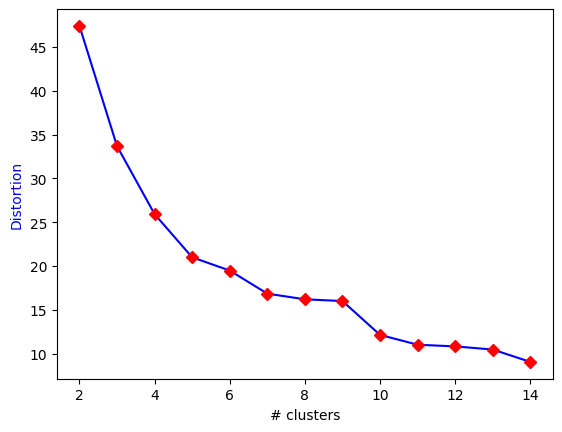

In [14]:
distortions = []
silhouette = []
K = range(2,15)

for k in tqdm(K):
    kmeanModel = like_kmeans(centroids=k, X=frame_of_rev.values)
    distortions.append(kmeanModel[1])
        
fig, ax1 = plt.subplots()       
ax1.plot(K, distortions,'ro-', marker='D', color='blue', markerfacecolor='red', markeredgecolor='red')
ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
      
plt.show()

### From the graph, the optimal number of clusters is 5

In [46]:
n_optional_clusters = 5

### Distribute assets into clusters with a given optimal number of centroids

In [47]:
kMeanModel = like_kmeans(centroids=n_optional_clusters, X=frame_of_rev.values)
frame_of_rev['Cluster'] = kMeanModel[2]
frame_of_rev

,Revenue,Risk,Cluster
shortName,,,
BTC,0.045137,3.009180,2
ETH,0.027622,3.761612,2
BNB,0.044326,3.444668,2
ADA,-0.123853,4.323931,1
DOGE,-0.080122,5.081765,1
SHIB,0.099095,7.356545,3
LTC,-0.074838,4.160582,2
ETC,-0.077943,4.926179,1
BCH,-0.037142,4.674006,1


In [49]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(15, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.shortName}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

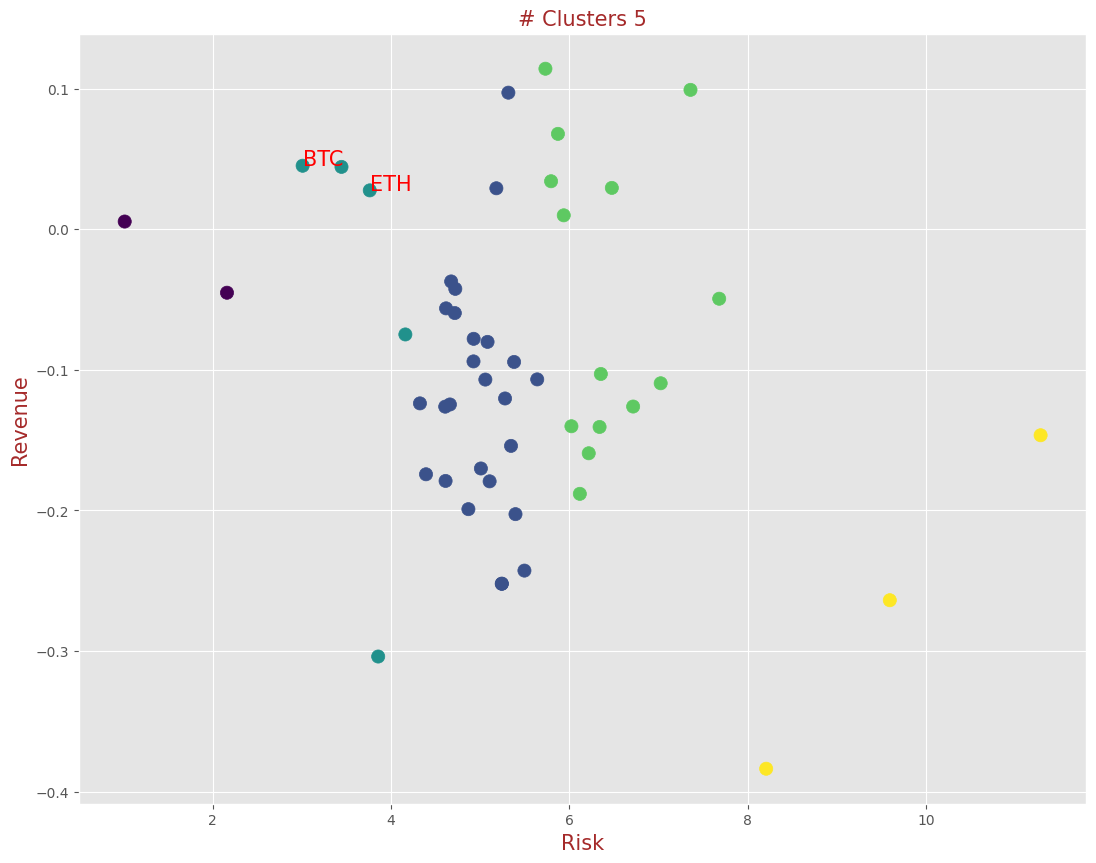

In [51]:
n_cluster = n_optional_clusters
for t in range(1):
    df = frame_of_rev
    plt.style.use('ggplot')
    fig, ax1 = plt.subplots(figsize=(13,10))
    
    Cluster = df.iloc[:,2]    # Labels of cluster 0 to 3
    scatter = ax1.scatter(df.iloc[:,1],df.iloc[:,0],c=Cluster, s=90)
    
    ax1.set_xlabel('Risk', color='#A52A2A', fontsize=15)
    ax1.set_ylabel('Revenue', color='#A52A2A', fontsize=15)
    plt.title(f'# Clusters {n_cluster}', color='#A52A2A', fontsize=15)
    
    ax1.grid(True)
    for i, asset in enumerate(df.index):
        if (asset == 'BTC') or (asset == 'ETH'):
            ax1.text(df.iloc[i,1], df.iloc[i, 0], asset, color='red', fontsize=15)
    plt.show()

In [45]:
df

,Revenue,Risk,Cluster
shortName,,,
BTC,0.045137,3.009180,2
ETH,0.027622,3.761612,1
BNB,0.044326,3.444668,2
ADA,-0.123853,4.323931,1
DOGE,-0.080122,5.081765,3
SHIB,0.099095,7.356545,4
LTC,-0.074838,4.160582,1
ETC,-0.077943,4.926179,3
BCH,-0.037142,4.674006,3


## Other modern algorithms for clustering

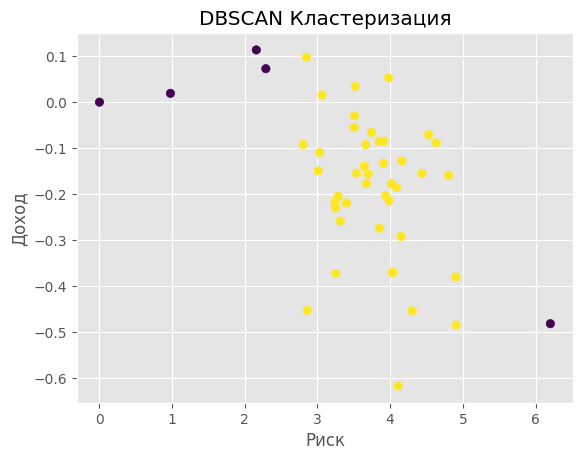

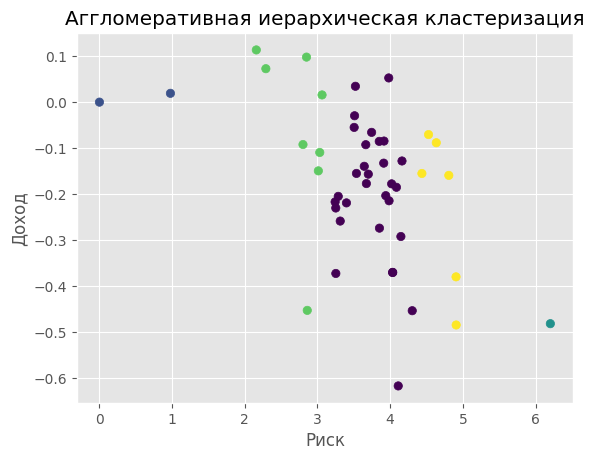

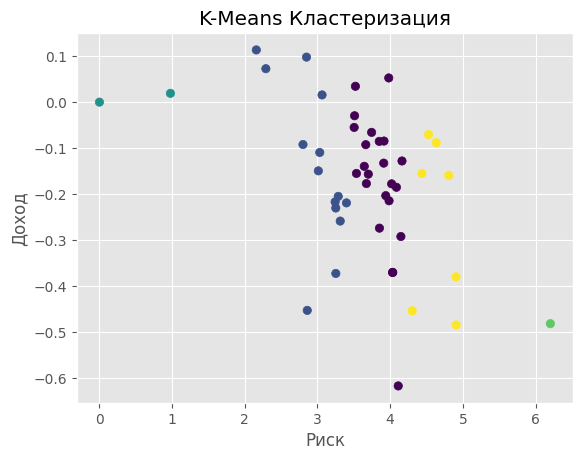

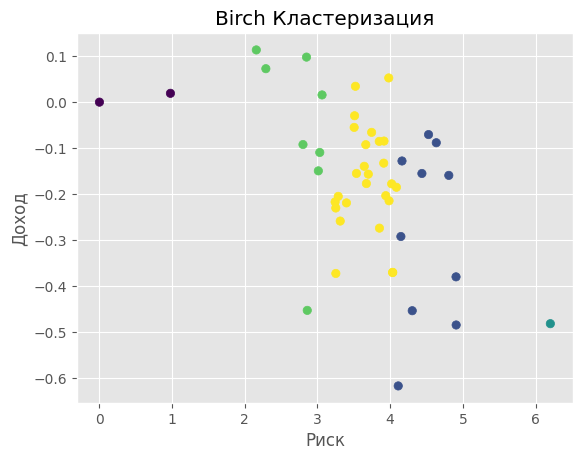

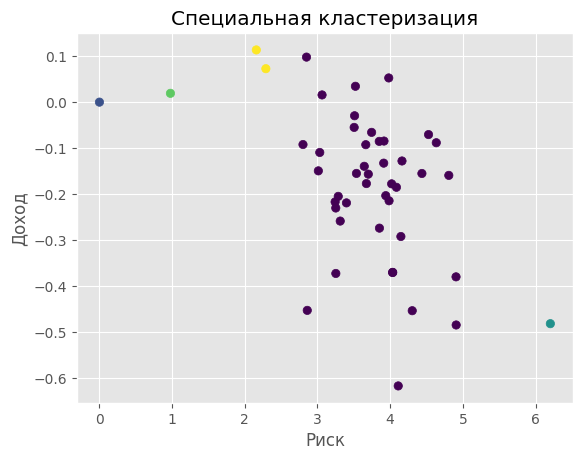

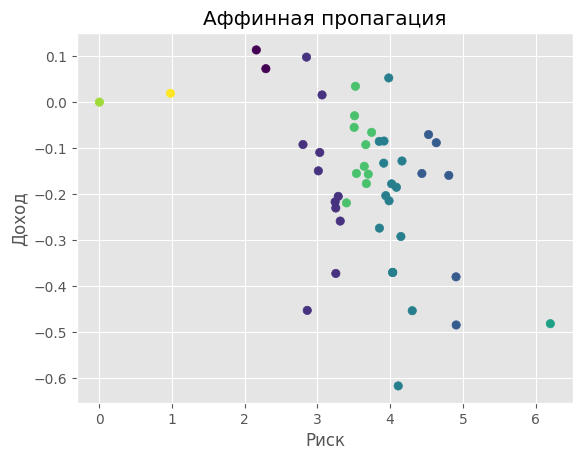

In [198]:
db = DBSCAN().fit(frame_of_rev[['Revenue', 'Risk']])
labels_db = db.labels_

# Agglomerative Hierarchical Clustering
aghc = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(frame_of_rev[['Revenue', 'Risk']])
labels_aghc = aghc.labels_

# K-means
kmeans = KMeans(n_clusters=5).fit(frame_of_rev[['Revenue', 'Risk']])
labels_kmeans = kmeans.labels_

# Birch
birch_model = Birch(n_clusters=5)
labels_birch = birch_model.fit_predict(frame_of_rev[['Revenue', 'Risk']])

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5).fit(frame_of_rev[['Revenue', 'Risk']])
labels_spectral = spectral_clustering.labels_

# Affinity Propagation
affinity_propagation = AffinityPropagation().fit(frame_of_rev[['Revenue', 'Risk']])
labels_affinity = affinity_propagation.labels_

# Visualize
def plot_clusters(labels, title):
    plt.scatter(frame_of_rev['Risk'], frame_of_rev['Revenue'], c=labels, cmap='viridis')
    plt.xlabel('Риск')
    plt.ylabel('Доход')
    plt.title(title)
    plt.show()


plot_clusters(labels_db, 'DBSCAN Clustering')
plot_clusters(labels_aghc, 'Agglomerative Hierarchical Clustering')
plot_clusters(labels_kmeans, 'K-Means Clustering')
plot_clusters(labels_birch, 'Birch Clustering')
plot_clusters(labels_spectral, 'Spectral Clustering')
plot_clusters(labels_affinity, 'Affinity Propagation')

# Conclusion:
1. Correct the mistake with a revenue calculation function.
2. A variety of advanced clustering algorithms.